<a href="https://colab.research.google.com/github/franklinhamer2727/Examen-sustitutorio-de-macrodatos/blob/main/Modelos_preentrenados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [ ]:
def mlp_classifier_single_perceptron():
    # Cargar el conjunto de datos MNIST
    mnist = fetch_openml(name='mnist_784', version=1, parser='auto')
    X, y = mnist.data, mnist.target

    # Divide el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Escala las características para mejorar la convergencia
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Ajusta el clasificador MLP con una sola capa oculta (un solo perceptrón)
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(1,), max_iter=100, random_state=42)

    mlp_classifier.fit(X_train, y_train)
    y_pred = mlp_classifier.predict(X_test)

    # Calcula la precisión del modelo en el conjunto de prueba
    accuracy = accuracy_score(y_test, y_pred)
    print("Precisión del clasificador MLP con un solo perceptrón:", accuracy)

    return mlp_classifier



In [ ]:

mlp_classifier_single_perceptron()

Precisión del clasificador MLP con un solo perceptrón: 0.4275


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(1,), max_iter=100, random_state=42)

In [ ]:
model = mlp_classifier_single_perceptron()


Precisión del clasificador MLP con un solo perceptrón: 0.4275


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import joblib
# Guardar el modelo en un archivo
filename = 'mlp_model.joblib'
joblib.dump(model, filename)

['mlp_model.joblib']

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import joblib


In [ ]:
def svm_classifier_single_perceptron():
    # Cargar el conjunto de datos MNIST
    mnist = fetch_openml(name='mnist_784', version=1, parser='auto')
    X, y = mnist.data, mnist.target

    # Divide el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Escala las características para mejorar la convergencia
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Ajustar el clasificador SVM lineal con un solo perceptrón
    svm_classifier = SVC(kernel='linear', random_state=42)

    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)

    # Calcula la precisión del modelo en el conjunto de prueba
    accuracy = accuracy_score(y_test, y_pred)
    print("Precisión del clasificador SVM lineal con un solo perceptrón:", accuracy)

    return svm_classifier




In [ ]:
svm_classifier_single_perceptron()

Precisión del clasificador SVM lineal con un solo perceptrón: 0.9210714285714285


SVC(kernel='linear', random_state=42)

In [ ]:

# Entrenar el modelo
model = svm_classifier_single_perceptron()
filename = 'svm_classifier_model.joblib'
joblib.dump(model, filename)

Precisión del clasificador SVM lineal con un solo perceptrón: 0.9210714285714285


['svm_classifier_model.joblib']

In [ ]:
data = np.random.rand(5, 784)

In [ ]:
import numpy as np
import pickle
import joblib

# Generar datos aleatorios (ejemplo)


def load_model():
    # Cargar el modelo MLP entrenado desde el archivo mlp_model.joblib
    return joblib.load('mlp_model.joblib')

def make_predictions(data, mlp_model):
    # Escalar las características para mejorar la convergencia (misma escala que se usó durante el entrenamiento)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Hacer predicciones con el modelo
    predictions = mlp_model.predict(data_scaled)
    return predictions

if __name__ == "__main__":
    # Cargar el modelo MLP entrenado
    mlp_model = load_model()

    # Hacer predicciones con los datos generados
    predictions = make_predictions(data, mlp_model)

    print("Predicciones:", predictions)


Predicciones: ['1' '2' '7' '7' '2']


In [ ]:
import numpy as np
import pickle
import joblib

# Generar datos aleatorios (ejemplo)


def load_model():
    # Cargar el modelo SVM entrenado desde el archivo svm_classifier_model.joblib
    return joblib.load('svm_classifier_model.joblib')

def make_predictions(data, svm_model):
    # Escalar las características para mejorar la convergencia (misma escala que se usó durante el entrenamiento)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Hacer predicciones con el modelo
    predictions = svm_model.predict(data_scaled)
    return predictions

if __name__ == "__main__":
    # Cargar el modelo SVM entrenado
    svm_model = load_model()

    # Hacer predicciones con los datos generados
    predictions = make_predictions(data, svm_model)

    print("Predicciones:", predictions)


Predicciones: ['3' '5' '6' '9' '4']


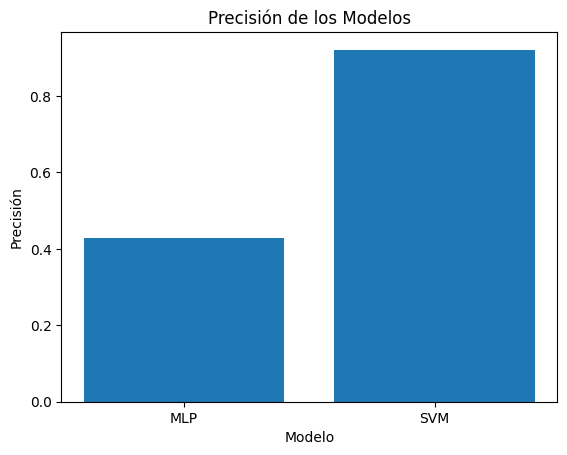

In [ ]:
import matplotlib.pyplot as plt

# Datos de precisión para MLP y SVM (sustituye con tus propios valores)
precision_mlp = 0.4275
precision_svm = 0.9210714285714285

# Etiquetas para los modelos en el gráfico
model_labels = ['MLP', 'SVM']

# Valores de precisión para cada modelo
precision_values = [precision_mlp, precision_svm]

# Crear el gráfico de barras
plt.bar(model_labels, precision_values)

# Agregar título y etiquetas a los ejes
plt.title('Precisión de los Modelos')
plt.xlabel('Modelo')
plt.ylabel('Precisión')

# Mostrar el gráfico
plt.show()
